[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/ML-AI-for-the-Working-Analyst/blob/main/Semana7/SpectralClustering.ipynb)

# Clusterización de trayectorias usando Clustering Espectral y KMeans

## Dependencias

In [ ]:
import urllib
import zipfile
import os
import scipy.io
import math

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import directed_hausdorff
from scipy import linalg

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

# Some visualization stuff, not so important
sns.set()
plt.rcParams['figure.figsize'] = (15, 15)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funciones

In [ ]:
def plot_cluster(traj_lst, cluster_lst):
    cluster_count = np.max(cluster_lst) + 1
    
    for traj, cluster in zip(traj_lst, cluster_lst):
        plt.plot(traj[:, 0], traj[:, 1], c=plt.cm.tab20(cluster))
    plt.show()

## Obtención de los datos

Trabajaremos con el dataset LABOMNI que contiene trayectorias de humanos caminando por un laboratorio capturadas usando una cámara omni-direccional.

In [ ]:
# link descontinuado 'http://cvrr.ucsd.edu/LISA/Datasets/TrajectoryClustering/CVRR_dataset_trajectory_clustering.zip', era el oficial

filename = '/content/drive/MyDrive/Curso-WorkingAnalyst/semana7/labomni.mat'

###### Función util si aún hay link, descarga un .zip
# is_download_required = not os.path.exists(data_folder)

#if is_download_required:
#    zip_filename = 'data.zip'
#    urllib.request.urlretrieve(dataset_link, zip_filename)
#    zip_ref = zipfile.ZipFile(zip_filename, 'r')
#    zip_ref.extractall(data_folder)
#    zip_ref.close()

# Import dataset
traj_data = scipy.io.loadmat(filename)['tracks']

traj_lst = []
for data_instance in traj_data:
    traj_lst.append(np.vstack(data_instance[0]).T)


In [ ]:
raw_data = scipy.io.loadmat(filename)

In [ ]:
np.vstack(raw_data['tracks'][0][0].T)

array([[106. , 150.5],
       [107.5, 149.5],
       [105.5, 151. ],
       [110.5, 150. ],
       [108.5, 149.5],
       [109. , 148.5],
       [109. , 149. ],
       [109.5, 148.5],
       [110. , 148. ],
       [109.5, 146.5],
       [110. , 146.5],
       [109.5, 146.5],
       [109.5, 145.5],
       [109. , 145. ],
       [109. , 143.5],
       [109.5, 143. ],
       [110. , 142.5],
       [111.5, 143. ],
       [112. , 143.5],
       [112.5, 144. ],
       [112.5, 147. ],
       [113. , 147. ],
       [112.5, 147. ],
       [112.5, 147.5],
       [113. , 147.5],
       [113. , 146.5],
       [112.5, 146. ],
       [113.5, 146. ],
       [113.5, 146. ],
       [115.5, 146.5],
       [117. , 146.5],
       [117.5, 146. ],
       [117.5, 146. ],
       [117.5, 147.5],
       [117.5, 146. ],
       [117.5, 147.5],
       [117. , 148. ],
       [117. , 148.5],
       [117.5, 153. ],
       [119.5, 152.5],
       [120. , 153.5],
       [122.5, 154. ],
       [123. , 153.5],
       [123

In [ ]:
# La longitud de la lista es la cantidad de caminos
traj_lst

[array([[106. , 150.5],
        [107.5, 149.5],
        [105.5, 151. ],
        [110.5, 150. ],
        [108.5, 149.5],
        [109. , 148.5],
        [109. , 149. ],
        [109.5, 148.5],
        [110. , 148. ],
        [109.5, 146.5],
        [110. , 146.5],
        [109.5, 146.5],
        [109.5, 145.5],
        [109. , 145. ],
        [109. , 143.5],
        [109.5, 143. ],
        [110. , 142.5],
        [111.5, 143. ],
        [112. , 143.5],
        [112.5, 144. ],
        [112.5, 147. ],
        [113. , 147. ],
        [112.5, 147. ],
        [112.5, 147.5],
        [113. , 147.5],
        [113. , 146.5],
        [112.5, 146. ],
        [113.5, 146. ],
        [113.5, 146. ],
        [115.5, 146.5],
        [117. , 146.5],
        [117.5, 146. ],
        [117.5, 146. ],
        [117.5, 147.5],
        [117.5, 146. ],
        [117.5, 147.5],
        [117. , 148. ],
        [117. , 148.5],
        [117.5, 153. ],
        [119.5, 152.5],
        [120. , 153.5],
        [122.5, 

In [ ]:
traj_lst[0].shape

(156, 2)

## Visualización de los datos

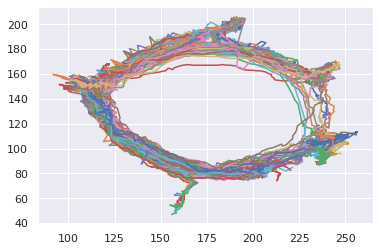

In [ ]:
# Plotting

for traj in traj_lst:
    plt.plot(traj[:, 0], traj[:, 1])

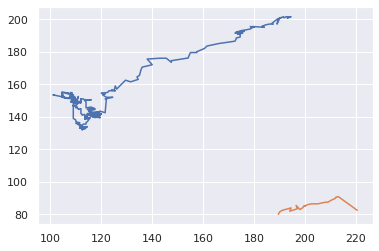

In [ ]:
for traj in traj_lst[157:158]+traj_lst[193:194]:
    plt.plot(traj[:, 0], traj[:, 1])

# Exploración de los datos



In [ ]:
# auxiliar
lenghts = [len(i) for i in traj_lst]

array = np.array(lenghts)

In [ ]:
# Pequeño ejercicio: 
# Encontrar los conjuntos de puntos mas grande y el mas pequeño 
#                        Pista: np.where()
index = np.where(array == array.max())[0][0]   
print(index)
traj_lst[index]

157


array([[101.5, 153.5],
       [101. , 153.5],
       [107. , 151.5],
       ...,
       [194. , 201. ],
       [194.5, 201.5],
       [194.5, 201.5]])

In [ ]:
len(traj_lst[index])

624

In [ ]:
index2 = np.where(array == array.min())[0][0]
print(index2)
len(traj_lst[index2])

193


30

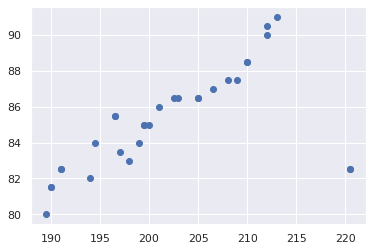

In [ ]:
# En realidad, ¿que son nuestros datos?
plt.scatter(traj_lst[193][:,0], traj_lst[193][:,1])

# Distancia de Hausdorff

Para calcular la similitud entre dos trayectorias utilizaremos la distancia de Hausdorff programada en [```scipy.spatial.distance.directed_hausdorff```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.directed_hausdorff.html). .

In [ ]:
# ¿Resulta familiar?
punto_a = np.array([[0,0]])
punto_b = np.array([[3,4]])
directed_hausdorff(punto_b, punto_a)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:456: UserWarning: you are shuffling a '_memoryviewslice' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  result = _hausdorff.directed_hausdorff(u, v, seed)


(5.0, 0, 0)

In [ ]:
# ¿Y ahora?
conj_a = np.array([[1,1],[0,0]])
conj_b = np.array([[1,1]])
directed_hausdorff(conj_b, conj_a)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:456: UserWarning: you are shuffling a '_memoryviewslice' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  result = _hausdorff.directed_hausdorff(u, v, seed)


(0.0, 0, 1)

In [ ]:
conj_b

array([[1, 1]])

In [ ]:
# Intente calcular la distancia de hausdorff entre 2 elementos y vea gráficamente que ocurre

## Matriz de similitud/distancia/adyacencia

In [ ]:
%%time
def hausdorff( u, v):
    d = max(directed_hausdorff(u, v)[0], directed_hausdorff(v, u)[0])
    return d

traj_count = len(traj_lst)
A = np.zeros((traj_count, traj_count))

# This may take a while
for i in range(traj_count):
    for j in range(i + 1, traj_count):
        distance = hausdorff(traj_lst[i], traj_lst[j])
        A[i, j] = distance
        A[j, i] = distance

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:456: UserWarning: you are shuffling a '_memoryviewslice' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  result = _hausdorff.directed_hausdorff(u, v, seed)


CPU times: user 25 s, sys: 175 ms, total: 25.2 s
Wall time: 25.1 s


In [ ]:
print(A.shape)
A[:10, :4]

(209, 209)


array([[  0.        ,   5.22015325, 119.42466244,  93.03897033],
       [  5.22015325,   0.        , 118.59279067,  90.5       ],
       [119.42466244, 118.59279067,   0.        ,  43.48850423],
       [ 93.03897033,  90.5       ,  43.48850423,   0.        ],
       [110.40040761, 109.41320761,  29.9207286 ,  34.61574786],
       [ 10.79351657,  11.88486432, 118.12070098,  92.38641675],
       [ 29.34706118,  31.08456208, 105.77452434,  96.08459814],
       [ 91.21951546,  90.16789894,  47.5394573 ,  12.08304597],
       [ 91.        ,  90.50966799,  38.46101923,  14.31782106],
       [ 92.00135869,  90.56765427,  44.26341605,  15.53222457]])

In [ ]:
# PENDIENTE (minimo sin contar los ceros)
np.min(A[A > 0])

2.5495097567963922

In [ ]:
np.min(A[A > 4])

4.031128874149275

## Clustering Espectral

Obtenemos la $D$ que es una matriz diagonal en la que tendremos el ```grado``` de la trayectoría $i$ en la $i-ésima$ entrada.

$D_{i} = \sum_j A_{i, j}$

In [ ]:
D_vect = A.sum(axis = 1)
D_vect

array([14077.72913449, 14076.94421585, 18175.12716976, 15590.64414716,
       16344.07778003, 13939.55733116, 13149.7881756 , 15450.41869125,
       15267.12597367, 15363.54304727, 17435.40152492, 15470.97882327,
       15594.14286919, 15161.13900651, 15441.67852206, 15255.13147873,
       13891.81453799, 15488.03096285, 14069.89627845, 16114.45756945,
       16146.15684521, 14572.3952677 , 14684.80005564, 13890.21485182,
       15251.05615542, 16525.30167735, 15350.91202929, 16370.99492272,
       15405.50567339, 16237.71737678, 15468.17540159, 15311.57026348,
       14230.4178836 , 13541.30637072, 14642.54663251, 13759.99248373,
       14247.36060249, 14383.93824583, 15383.95309409, 14057.44953763,
       13809.81619373, 15123.09952118, 15306.27884099, 16099.83859215,
       14578.13335429, 15664.75910663, 16566.47044024, 17448.45440525,
       15042.54278998, 14066.47797928, 14420.83120517, 15485.6500341 ,
       14923.60874955, 14746.19845653, 17612.21340146, 14871.33662258,
      

In [ ]:
D_vect = A.sum(axis = 1) # suma por renglones
D = np.diag(D_vect) # matriz diagonal de un vector
D[:10, :4]

array([[14077.72913449,     0.        ,     0.        ,     0.        ],
       [    0.        , 14076.94421585,     0.        ,     0.        ],
       [    0.        ,     0.        , 18175.12716976,     0.        ],
       [    0.        ,     0.        ,     0.        , 15590.64414716],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ]])

Calculamos la matriz $L$. No es la matriz Laplaciana de $A$, pero esta relacionada.

$L = D^{-1/2}~A~D^{-1/2}$

In [ ]:
D_sqrtinv = np.diag(np.sqrt(1/D_vect))
L_norm = D_sqrtinv @ A @ D_sqrtinv
L_norm[:10, :4]

array([[0.        , 0.00037082, 0.00746602, 0.0062801 ],
       [0.00037082, 0.        , 0.00741422, 0.00610889],
       [0.00746602, 0.00741422, 0.        , 0.00258347],
       [0.0062801 , 0.00610889, 0.00258347, 0.        ],
       [0.0072782 , 0.00721332, 0.00173601, 0.00216851],
       [0.0007705 , 0.00084843, 0.00742101, 0.00626688],
       [0.00215694, 0.00228471, 0.006842  , 0.00671062],
       [0.00618517, 0.00611403, 0.00283691, 0.00077853],
       [0.00620721, 0.00617394, 0.00230889, 0.00092804],
       [0.00625579, 0.00615848, 0.00264887, 0.00100359]])

In [ ]:
L_norm.shape

(209, 209)

Hacemos la descomposición en valores singulares 

$L = U~\Sigma~V^T$.

Los eigenvectores van son las columnas de $U$.

In [ ]:
U, sigma, _ = linalg.svd(L_norm, full_matrices=False)
print(U.shape, sigma.shape)
sigma[:10]

(209, 209) (209,)


array([1.        , 0.40306362, 0.20296684, 0.08921658, 0.07016062,
       0.03517341, 0.02390854, 0.01736468, 0.01192526, 0.00989487])

In [ ]:
suma = sigma.sum()
suma_parcial = sigma[:15].sum()
suma_parcial/suma

0.935811408519472

In [ ]:
sigma[200]

4.2410699931851026e-05

Definimos $k$ como el número de clusters que queremos crear y nos *quedamos* con los $k$ eigenvectores correspondientes a los $k$ eigenvalores más grandes.

In [ ]:
k = 15
Uk = U[:, :k]
Uk.shape

(209, 15)

Finalmente, normalizamos cada fila de la matriz resultante, $U_k$, y ocupamos éstas como *feature vectors* para KMeans.

In [ ]:
y_pred = KMeans(n_clusters = k).fit_predict(normalize(Uk))
y_pred

array([14, 14,  5,  2,  6, 13, 13,  2,  2,  2,  3,  6,  2,  2,  2,  2,  0,
        2, 14,  6,  6,  9,  9,  0,  2,  6,  2,  6,  2,  6,  2,  2, 14, 13,
        9,  0,  7,  7,  2, 14, 14,  1,  2,  6,  9,  2,  6,  5,  1, 13,  7,
        3,  3,  9,  5,  9,  9,  0,  9,  9,  1,  0,  9, 13,  2, 10,  4,  2,
        6, 11,  8,  8,  0,  5,  7,  1,  8, 14,  0, 13,  0,  3,  1,  1,  0,
        6,  4,  9, 14,  8,  3,  2,  1,  8,  8,  9,  2,  6,  9,  9, 12, 14,
        0,  9,  9, 14,  0,  2, 14,  6,  2,  9,  6,  2,  2,  7,  7,  7,  0,
        0,  7,  0,  5,  7,  0,  0,  2,  0,  2,  0,  0,  5,  0,  0,  6,  2,
        3,  7,  7,  5,  7,  0,  7,  7,  7,  7, 11,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  9,  7,  7,  0,  0,  5,  2,  4, 11, 13,  2,  0,  3,
        7,  9,  7,  2,  4,  4,  4, 12,  7,  7, 11, 14, 12,  7, 10, 10,  2,
       14, 14, 12,  4, 10,  4, 10, 10,  0,  1,  0,  0,  2,  2,  7,  8,  0,
        7, 11, 14,  8,  0], dtype=int32)

In [ ]:
y_pred = y_pred + 1

In [ ]:
y_pred.shape

(209,)

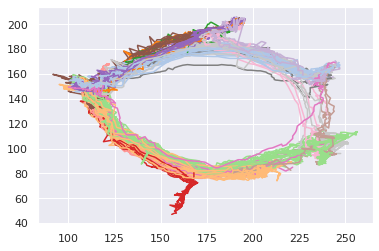

In [ ]:
plot_cluster(traj_lst, y_pred)

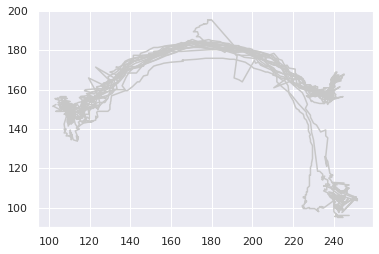

In [ ]:
cluster_n = 15
plot_cluster([i for (i, v) in zip(traj_lst, y_pred == cluster_n) if v], y_pred[y_pred == cluster_n])

In [ ]:
y_pred

array([15, 15,  6,  3,  7, 14, 14,  3,  3,  3,  4,  7,  3,  3,  3,  3,  1,
        3, 15,  7,  7, 10, 10,  1,  3,  7,  3,  7,  3,  7,  3,  3, 15, 14,
       10,  1,  8,  8,  3, 15, 15,  2,  3,  7, 10,  3,  7,  6,  2, 14,  8,
        4,  4, 10,  6, 10, 10,  1, 10, 10,  2,  1, 10, 14,  3, 11,  5,  3,
        7, 12,  9,  9,  1,  6,  8,  2,  9, 15,  1, 14,  1,  4,  2,  2,  1,
        7,  5, 10, 15,  9,  4,  3,  2,  9,  9, 10,  3,  7, 10, 10, 13, 15,
        1, 10, 10, 15,  1,  3, 15,  7,  3, 10,  7,  3,  3,  8,  8,  8,  1,
        1,  8,  1,  6,  8,  1,  1,  3,  1,  3,  1,  1,  6,  1,  1,  7,  3,
        4,  8,  8,  6,  8,  1,  8,  8,  8,  8, 12,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5, 10,  8,  8,  1,  1,  6,  3,  5, 12, 14,  3,  1,  4,
        8, 10,  8,  3,  5,  5,  5, 13,  8,  8, 12, 15, 13,  8, 11, 11,  3,
       15, 15, 13,  5, 11,  5, 11, 11,  1,  2,  1,  1,  3,  3,  8,  9,  1,
        8, 12, 15,  9,  1], dtype=int32)

In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 1 30]
 [ 2  8]
 [ 3 34]
 [ 4  7]
 [ 5 18]
 [ 6  8]
 [ 7 15]
 [ 8 25]
 [ 9  8]
 [10 19]
 [11  6]
 [12  5]
 [13  4]
 [14  7]
 [15 15]]


### Ejercicios

- En este notebook esta implementado el algoritmo de Ng, Jordan y Weiss (NJW). Implementar cualquier otro algoritmo ([referencia](https://sites.stat.washington.edu/spectral/papers/UW-CSE-03-05-01.pdf))
- Comparar los resultados obtenidos con los verdaderos clusters que se encuentran en ```scipy.io.loadmat(filename)['truth']``` (pistas abajo)


In [ ]:
y_true = scipy.io.loadmat(filename)['truth']

In [ ]:
y_true

In [ ]:
import pandas as pd
true_pd = pd.DataFrame([element[0] for element in y_true])

In [ ]:
true_pd.value_counts()

6     36
5     30
7     28
2     25
14    22
11    20
9     11
1      8
3      8
10     4
13     4
15     4
4      3
8      3
12     3
dtype: int64

In [ ]:
y_pred

array([15, 15,  6,  3,  7, 14, 14,  3,  3,  3,  4,  7,  3,  3,  3,  3,  1,
        3, 15,  7,  7, 10, 10,  1,  3,  7,  3,  7,  3,  7,  3,  3, 15, 14,
       10,  1,  8,  8,  3, 15, 15,  2,  3,  7, 10,  3,  7,  6,  2, 14,  8,
        4,  4, 10,  6, 10, 10,  1, 10, 10,  2,  1, 10, 14,  3, 11,  5,  3,
        7, 12,  9,  9,  1,  6,  8,  2,  9, 15,  1, 14,  1,  4,  2,  2,  1,
        7,  5, 10, 15,  9,  4,  3,  2,  9,  9, 10,  3,  7, 10, 10, 13, 15,
        1, 10, 10, 15,  1,  3, 15,  7,  3, 10,  7,  3,  3,  8,  8,  8,  1,
        1,  8,  1,  6,  8,  1,  1,  3,  1,  3,  1,  1,  6,  1,  1,  7,  3,
        4,  8,  8,  6,  8,  1,  8,  8,  8,  8, 12,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5, 10,  8,  8,  1,  1,  6,  3,  5, 12, 14,  3,  1,  4,
        8, 10,  8,  3,  5,  5,  5, 13,  8,  8, 12, 15, 13,  8, 11, 11,  3,
       15, 15, 13,  5, 11,  5, 11, 11,  1,  2,  1,  1,  3,  3,  8,  9,  1,
        8, 12, 15,  9,  1], dtype=int32)

In [ ]:
comparative = pd.concat([true_pd, pd.DataFrame(y_pred, columns=[1])], axis=1)

In [ ]:
comparative.rename(columns = {0:'True', 1:'Predicted'}, inplace = True)

In [ ]:
comparative

,True,Predicted
0,5,15
1,11,15
2,1,6
3,2,3
4,7,7
...,...,...
204,14,8
205,5,12
206,11,15
207,13,9


In [ ]:
comparative[comparative['True'] == comparative['Predicted']]

,True,Predicted
4,7,7
11,7,7
19,7,7
20,7,7
25,7,7
27,7,7
29,7,7
43,7,7
46,7,7
68,7,7


Otro Ejercicio: ¿Porque creen que pasa lo anterior?